***Tarea S9.10. Analítica de datos en Pandas***

**Descripción**

En esta tarea te enfrentarás a un ejercicio de limpieza y analítica de datos.

Tenemos un dataset proveniente de una encuesta a nuestros trabajadores y trabajadoras, y debemos garantizar que los datos se procesen correctamente, tanto en formato como en legibilidad.


# **Nivel 1**

## N1.E01.

 - Importa como un DataFrame el archivo sprint10.xlsx. Asegúrate de que el archivo se importa correctamente, con los nombres de columnas que le corresponden, sin manipular el archivo original.

 - Ordena el DataFrame por el país de origen. En caso de empate, ordena por el nombre de la ciudad.

 - Muestra las primeras 10 filas.

Adicionalmente, realiza un print donde compruebe que el DNI sólo tiene valores únicos.

### N1.E01.1 Funciones auxiliares

In [41]:
# Importar librerias que usare
import pandas as pd
from pprint import pprint

In [96]:
def importar_excel_df(fichero:str, cabecera:int=0)->pd.DataFrame:
    """Recibe el nombre de un fichero excel con su path si esta fuera del directorio de trabajo y 
    la linea donde esta la cabecera (por defecto es la primera) para cargarlo y devolverlo en un DataFrame

    Args:
        fichero (str): Nombre del fichero excel a cargar en el DF
        cabecera (int, optional): Línea donde esta la cabecera en el fichero excel. Defaults to 0.

    Returns:
        pd.DataFrame: DF con con el fichero excel cargado
    """
    
    try:
        df = pd.read_excel(fichero,
                    header=cabecera,
                    index_col = 0                
        )
        return(df)
    except FileNotFoundError:
        print(f"ERROR: no se encontró el fichero '{fichero}'")
        return None

In [43]:
def ejecutar_nivel1_ejercicio_1():
    """Orquestador para le ejecucion del ejercicio 1 del nivel 1

    Returns:
        _type_: Devuelve el DF origial cargado para poder usarlo en otros ejercicios
    """
    df_original = importar_excel_df("sprint10.xlsx",3)


    df_original = df_original.sort_values(by=["País d'origen","Ciutat"], ascending = [True, True])
    display(df_original.head(10))
    
    print(f"\nTotal valores duplicados en columna DNI = {df_original['DNI'].duplicated().sum()}")
    print(f"\nTotal valores nulos en columna DNI = {df_original['DNI'].isnull().sum()}")
    
    return df_original

### N1-E01.2 Programa principal

In [44]:
df_original = ejecutar_nivel1_ejercicio_1()

,Nom,Cognoms,DNI,País d'origen,Ciutat,Dia de Naixement,Mes de Naixement,Any de Naixement,Gènere,Salari mensual,Fills,No Fills,Grup Professional
21,Mia,Schneider Fischer,28973553Z,Alemanya,Berlín,22,10,1976,A,951 €,NaN,1.0,Grup A
154,Laura,Schneider Fischer,37399141L,Alemanya,Berlín,2,2,1958,D,1.769 €,1.0,NaN,Grup B
224,Lea,Schneider Schneider,37368317L,Alemanya,Berlín,23,10,2005,D,2.013 €,NaN,1.0,Grup B
278,Mia,Fischer,21390098Z,Alemanya,Berlín,11,8,1950,D,1.557 €,1.0,NaN,Grup B
602,Jonas,Schneider,44060014R,Alemanya,Berlín,22,11,1985,H,2.754 €,1.0,NaN,Grup D
871,Lea,Fischer,14773153R,Alemanya,Berlín,9,9,1986,D,1.370 €,1.0,NaN,Grup A
281,Lea,Müller,23266650S,Alemanya,Hamburg,14,4,2003,D,1.314 €,NaN,1.0,Grup A
435,Anna,Müller,83274277X,Alemanya,Hamburg,1,1,1987,D,2.464 €,NaN,1.0,Grup C
444,Laura,Schmidt Müller,60161784X,Alemanya,Hamburg,15,6,1987,NC,2.035 €,1.0,NaN,Grup C
487,Lukas,Müller Fischer,60982309S,Alemanya,Hamburg,28,3,1971,H,2.042 €,NaN,1.0,Grup B



Total valores duplicados en columna DNI = 0

Total valores nulos en columna DNI = 0


***################################################################################################################################***

## N1.E02.

 - Crea una columna que sea el nombre completo.

 - Crea una columna si la persona ha nacido en España o no.

 - Pone el DNI como índice del DataFrame (nombres de filas).

 - Sustituye el nombre de las columnas Día de Nacimiento, Mes de Nacimiento y Año de Nacimiento por Día, Mes y Año.

 - Sustituye a H por Hombre, D por Mujer, A por Otros y NC por un dato faltante (enano/null/na).

Muestra todos los cambios que has realizado en una sola tabla.

### N1.E02.1 Funciones auxiliares

In [45]:
import pandas as pd
import numpy as np

In [46]:
def nombre_apellidos (df_nom_ape:pd.DataFrame)->pd.DataFrame:
    """Crea una columna nueva llamada Nombre_completo donde junta las columnas de nombre y los apellidos

    Args:
        df_nom_ape (pd.DataFrame): Recibe el DF donde hay que crear la columa Nombre_completo

    Returns:
        pd.DataFrame: Devuelve el DF que recibio con la columna Nombre_completo creada y rellena
    """
    df_nom_ape["Nombre_completo"] = df_nom_ape["Nom"] + " " + df_nom_ape["Cognoms"]
    return df_nom_ape

In [47]:
def nacio_spain (df_nacio:pd.DataFrame)->pd.DataFrame:
    """Crea una columna nueva llamada Nacido_España donde pondra valor si o no segun haya nacido o no en España

    Args:
        df_nacio (pd.DataFrame): Recibe el DF donde hay que crear la columa Nacido_España

    Returns:
        pd.DataFrame: Devuelve el DF que recibio con la columna "Nacido_España" creada y rellena
    """
    df_nacio["Nacido_España"] = np.where(
        df_nacio["País d'origen"] == "Espanya",
        "si",
        "no"
        )
    
    return df_nacio

In [48]:
def cambia_indice(df_old:pd.DataFrame, columna_indice:str)->pd.DataFrame:
    """Recibe un DF y la column que quiere se ponga como indice.
    Comprueba que la columna no tenga valores nulos ni duplicados y:
    si NO los tiene cambia el indice
    Si SI tiene, no cambia el indice y devuelve el DF tal y como lo recibe y printa un mensaje de Advertencia 

    Args:
        df_old (pd.DataFrame): DF a cambiar el indice
        columna_indice (str): Nombre de la columna que quiero que sea indice

    Returns:
        pd.DataFrame: Devuelve el DF que recibio con el nuevo indice si lo ha cambiado o el DF original si no lo ha cambiado
    """
    
    if (df_old['DNI'].duplicated().sum() ==0) & (df_old['DNI'].isnull().sum() == 0):
        df_old = df_old.set_index(columna_indice)
    else:
        print(f"ADVERTENCIA: No se ha cambiado el indice ya que la columna '{columna_indice}' no tiene valores únicos y/o tiene valores nulos")
    
    
    return df_old
    

In [49]:
def cambia_nombre_columna(df_col_old:pd.DataFrame, col_old:str, col_new:str)->pd.DataFrame:
    """Recibe un DF, el nombre de una de sus columnas que quiere cambiar de nombre y el nuevo nombre para esa columna.
    Si no existe la columna, no cambia nada, devuelve el DF que se ha pasado e imprime un mensaje de advertencia

    Args:
        df_col_old (pd.DataFrame): DF al que hayq ue cambiar el nombre de la columna
        col_old (str): Nombre actual de la columna
        col_new (str): Nombre nuevo de la coliumna

    Returns:
        pd.DataFrame: Devuelve el DF que recibio con el nombre de columna cambiado si la ha cambiado o el DF original si no la ha cambiado
    """
    columnas = df_col_old.columns
    if col_old in columnas:
        df_col_old.rename(columns={col_old : col_new})
    else:
        print(f"ADVERTENCIA: No se ha cambiado el nombre de la columna {col_old} porque no existe en el DF que se ha pasado")
    
    return df_col_old

In [50]:
def sustituir_valor(df_old:pd.DataFrame, columna:str, valor_old:list, valor_new:list)->pd.DataFrame:
    """Recibe un DF para sustituir, en la columna que se le indica, un valor existente que se indica por otro nuevo que tambien se indica.
    Si no se puede hacer el cambio por no existir la columna o por no mandar las parejas de datos correctas,
    devuelve el DF recibido e imprime una advertencia

    Args:
        df_old (pd.DataFrame): DF al que hay que cambiar los valores
        columna (str): Columna del DF que se encuentran los valores a cambiar
        valor_old (list): Valor inicial que se quiere cambiar
        valor_new (list): Nuevo valor que se quiere poner

    Returns:
        pd.DataFrame: Devuelve el DF con los valores cambiados si se ha podido hacer el cambio o el DF que recibio si no se ha podido hacer el cambio
    """
    colums = df_old.columns
    
    if (len(valor_old) == len(valor_new)):
        if columna in colums:
            for valor in range (len(valor_old)):
                df_old.loc[df_old[columna] == valor_old[valor], columna] = valor_new[valor]   
        else:
            print(f"ADVERTENCIA: No se ha cambiado el nombre de la columna {columna} porque no existe en el DF que se ha pasado")
    else:
        print(f"ADVERTENCIA: No se han ejecutado el/los cambio/s de {valor_old} por {valor_new}. Razón:")
        print(f"No es igual el número de valores viejos ({len(valor_old)}) que el número de valores nuevos ({len(valor_new)}) a cambiar")
    return df_old

In [51]:
def ejecutar_nivel1_ejercicio_2():
    """Orquestador para le ejecucion del ejercicio 2 del nivel 1

    Returns:
        _type_: Devuelve el DF copia cargado para poder usarlo en otros ejercicios
    """
    # # cargo el fichero original aprovechando la función del ejercici 1
    # df_original = importar_excel_df("sprint10.xlsx")

    # Creo una copia del DF para conservar el original
    df_copia = df_original.copy()

    # Crea una columna que sea el nombre completo.
    df_copia = nombre_apellidos(df_copia)

    # Crea una columna si la persona ha nacido en España o no.
    df_copia = nacio_spain(df_copia)

    # Pone el DNI como índice del DataFrame (nombres de filas).
    df_copia = cambia_indice(df_copia,"DNI")

    # Sustituye el nombre de las columnas Día de Nacimiento, Mes de Nacimiento y Año de Nacimiento por Día, Mes y Año.
    df_copia = df_copia.rename(columns={"Dia de Naixement" : "Dia", "Mes de Naixement" : "Mes", "Any de Naixement" : "Año"}, inplace=False)

    # Sustituye a H por Hombre, D por Mujer, A por Otros y NC por un dato faltante (nan/null/na).
    lista_valor_old = ["H", "D", "A", "NC"]
    lista_valor_new =["Hombre", "Mujer", "Otros",np.nan]

    df_copia = sustituir_valor(df_copia, "Gènere", lista_valor_old, lista_valor_new)

    display(df_copia)
    
    return df_copia

### N1-E02.2 Programa principal

In [52]:
df_copia = ejecutar_nivel1_ejercicio_2()

,Nom,Cognoms,País d'origen,Ciutat,Dia,Mes,Año,Gènere,Salari mensual,Fills,No Fills,Grup Professional,Nombre_completo,Nacido_España
DNI,,,,,,,,,,,,,,
28973553Z,Mia,Schneider Fischer,Alemanya,Berlín,22,10,1976,Otros,951 €,NaN,1.0,Grup A,Mia Schneider Fischer,no
37399141L,Laura,Schneider Fischer,Alemanya,Berlín,2,2,1958,Mujer,1.769 €,1.0,NaN,Grup B,Laura Schneider Fischer,no
37368317L,Lea,Schneider Schneider,Alemanya,Berlín,23,10,2005,Mujer,2.013 €,NaN,1.0,Grup B,Lea Schneider Schneider,no
21390098Z,Mia,Fischer,Alemanya,Berlín,11,8,1950,Mujer,1.557 €,1.0,NaN,Grup B,Mia Fischer,no
44060014R,Jonas,Schneider,Alemanya,Berlín,22,11,1985,Hombre,2.754 €,1.0,NaN,Grup D,Jonas Schneider,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89577876S,Emily,Taylor Jones,Regne Unit,Manchester,28,3,1958,Mujer,2.033 €,NaN,1.0,Grup B,Emily Taylor Jones,no
57441590Y,George,Brown Jones,Regne Unit,Manchester,27,12,1979,Hombre,1.130 €,1.0,NaN,Grup A,George Brown Jones,no
58204038A,Olivia,Brown Brown,Regne Unit,Manchester,28,8,1952,Otros,1.023 €,NaN,1.0,Grup A,Olivia Brown Brown,no


***################################################################################################################################***

## N1.E03.

Junta las columnas Hijos y No Hijos en una sola columna, utilizando el método .apply() y definiendo una función que resuelva el problema.

La columna nueva debe llamarse "Hijos" y tomar los valores "Sí" o "No".

### N1.E03.1 Funciones auxiliares

In [53]:
def pasar_nan_a_cero(df_nan:pd.DataFrame, columns:list)->pd.DataFrame:
    """Recibe un DF y una lista de columnas para convertir los valores NaN de esas columnas a cero

    Args:
        df_nan (pd.DataFrame): DF al que convertir los valores NaN en 0
        columns (list): lista de columnas en las que solo transformara los NaN en 0

    Returns:
        _type_: Devuelve el Df con las columnas de la lista sin NaN
    """
    if set(columns).issubset(df_nan.columns):
        for columna in columns:
            df_nan.fillna(0, inplace = True)
    
    return df_nan

In [54]:
def tiene_hijos(fila:pd.Series)->str:
    """Entra cada fila de un DF y evalua el valor de las columnas "Fills" y "No Fills" devolviendo:
    Si cuando Fills=1 y No Fills=0
    No cuando Fills=0 y No Fills=1
    Incoherente cuando no se cumple ninguna de las anteriores (Fills = No Fills)

    Args:
        fila (_type_): Un fila entera del DF para evaluar fila por fila

    Returns:
        _type_: Valor obtenido según los valores de las columnas "Fills" y "No fills"
    """
    if (fila["Fills"] == 1) & (fila["No Fills"] == 0):
        return "Si"
    elif (fila["Fills"] == 0) & (fila["No Fills"] == 1):
        return "No"
    else:
        return "Incoherente"
    

In [55]:
def elimina_columnas(df_old:pd.DataFrame,colums:list)->pd.DataFrame:
    """Recibe un Df y una lista de columnas a borrar. 
    Primero comprueba que todas las columnas existen y si existen las borra y devuelve el DF resultante, 
    y si no existe alguna no borra nada, printa la advertencia y devuelve el DF tal y como lo recibio

    Args:
        df_old (pd.DataFrame): DF a borrar las columnas
        colums (list): Lista de columnas a borrar en el DF

    Returns:
        pd.DataFrame: DF resultante de haber borrado o no las columnas pasadas
    """
    if set(colums).issubset(df_old.columns):
        df_old.drop(colums, axis=1, inplace=True)
    else:
        print(f"ADVERTENCIA: Has pasado alguna columna ({colums}) que no exiten en el DF")
    return df_old

In [56]:
def ejecutar_nivel1_ejercicio_3(df_cop):
    """Orquestador para le ejecucion del ejercicio 3 del nivel 1

    Args:
        df_cop (_type_): Recibe el DF resultado del ejercicio anterior para seguir trabajando sobre él

    Returns:
        _type_: Devuelve el DF resultado despues de realizar el ejercivio 3
    """
    
    # Busco los valores NaN el las columnas "Fills" y "No Fills" y los cambio por cero
    lista_columnas = ["Fills", "No Fills"]
    df_cop = pasar_nan_a_cero(df_cop, lista_columnas)

    # Creo la columna "Hijos" y le asigo Si, No o Incoherente segun las columnas "Fills" y "No Fills". axis=1 => Por filas
    if set(lista_columnas).issubset(df_cop.columns):
        df_cop["Hijos"] = df_cop.apply(tiene_hijos, axis=1)

    # Borro las columnas "Fills" y "No Fills"
    df_cop = elimina_columnas(df_cop, lista_columnas)
    
    display(df_cop)

    return df_cop


### N1-E03.2 Programa principal

In [57]:
df_copia = ejecutar_nivel1_ejercicio_3(df_copia)


,Nom,Cognoms,País d'origen,Ciutat,Dia,Mes,Año,Gènere,Salari mensual,Grup Professional,Nombre_completo,Nacido_España,Hijos
DNI,,,,,,,,,,,,,
28973553Z,Mia,Schneider Fischer,Alemanya,Berlín,22,10,1976,Otros,951 €,Grup A,Mia Schneider Fischer,no,No
37399141L,Laura,Schneider Fischer,Alemanya,Berlín,2,2,1958,Mujer,1.769 €,Grup B,Laura Schneider Fischer,no,Si
37368317L,Lea,Schneider Schneider,Alemanya,Berlín,23,10,2005,Mujer,2.013 €,Grup B,Lea Schneider Schneider,no,No
21390098Z,Mia,Fischer,Alemanya,Berlín,11,8,1950,Mujer,1.557 €,Grup B,Mia Fischer,no,Si
44060014R,Jonas,Schneider,Alemanya,Berlín,22,11,1985,Hombre,2.754 €,Grup D,Jonas Schneider,no,Si
...,...,...,...,...,...,...,...,...,...,...,...,...,...
89577876S,Emily,Taylor Jones,Regne Unit,Manchester,28,3,1958,Mujer,2.033 €,Grup B,Emily Taylor Jones,no,No
57441590Y,George,Brown Jones,Regne Unit,Manchester,27,12,1979,Hombre,1.130 €,Grup A,George Brown Jones,no,Si
58204038A,Olivia,Brown Brown,Regne Unit,Manchester,28,8,1952,Otros,1.023 €,Grup A,Olivia Brown Brown,no,No


***################################################################################################################################***

## N1.E04.

 - Crea una tabla resumen que permita ver el sueldo medio, mediana, mínimo y máximo por Género.

 - Ordena la tabla en función del sueldo medio.

### N1.E04.1 Funciones auxiliares

In [58]:
def cambio_dinero_str_a_dinero_float(df_dinero:pd.DataFrame,column:str)->pd.DataFrame:
    """Recibe el DF y la columna que contiene el dinero en formato string con caracter €, espacio y punto para separar miles 
    y la trasforma a tipo float guardandolo en la misma columna

    Args:
        df_dinero (pd.DataFrame): DF con todos los datos
        column (str): Nombre de la columna a transformar a float

    Returns:
        pd.DataFrame: Devuelve el DG con la columna del dinero ya en float para poder operar con este dato
    """
    
    if (column in (df_dinero.columns)): 
        if (df_dinero[column].dtypes == object):
            df_dinero[column] = (
                df_dinero["Salari mensual"]
                .str.replace(".", "", regex=False)
                .str.replace("€", "", regex=False)
                .str.strip()
                .astype(float)
            )
            df_dinero[column] = df_dinero[column].astype(float)
        else:
            print(f"ADVERTENCIA: la columna ('{column}') ya no era de tipo object")
    else:
        print(f"ADVERTENCIA: la columna ('{column}') no exiten en el DF que quieres cambiarla")
    
    return df_dinero




In [59]:
def ejecutar_nivel1_ejercicio_4(df_cop)->pd.DataFrame:
    """Orquestador para le ejecucion del ejercicio 4 del nivel 1

    Args:
        df_cop (_type_): Recibe el DF resultado del ejercicio anterior para seguir trabajando sobre él

    Returns:
        _type_: Devuelve el DF resultado despues de realizar el ejercivio 4
    """
    # trasformo la columna "Salari mensual" de string con caracter €, espacio y punto para miles a float
    df_cop = cambio_dinero_str_a_dinero_float(df_cop,"Salari mensual")

    # Agrupa por genero y calcula media, mediana, min y max

    df_sueldos = df_cop.groupby("Gènere")["Salari mensual"].aggregate(["mean", "median" ,"min","max"]).round(1).rename(columns={
        "mean" : "media",
        "median" : "mediana"
    }).sort_values("media", ascending=False)
    
    display(df_sueldos)
    
    return df_cop

### N1-E04.2 Programa principal

In [60]:
df_copia = ejecutar_nivel1_ejercicio_4(df_copia)

,media,mediana,min,max
Gènere,,,,
Hombre,1643.2,1531.0,737.0,3356.0
Otros,1626.6,1545.0,703.0,3175.0
0,1568.9,1443.0,758.0,2969.0
Mujer,1469.4,1361.5,665.0,3021.0


***################################################################################################################################***

## N1.E05.

 - Crea una tabla resumen con el salario medio por género (filas) y país de origen (columnas).

 - Añade las medias a los márgenes de la tabla.

(EXTRA): Aplica formato condicional en la tabla para ver en un color más intenso los valores más elevados

### N1.E05.1 Funciones auxiliares

In [61]:
import pandas as pd

In [62]:
def ejecutar_nivel1_ejercicio_5(df_cop:pd.DataFrame):
    """Crea una tabla agrupando por genero en filas, columnas con pais de origen y valores la media de sus salarios.
    calcula tambien la media acumulada por fila y columna
    Formatea en gradiente de colores por valores

    Args:
        df_cop (pd.DataFrame): DF con los datos para crear la tabla
    """
    # Crear la tabla
    df_sueldos = pd.crosstab(df_cop["Gènere"],
                    df_cop["País d'origen"],
                    values=df_cop["Salari mensual"],
                    aggfunc='mean',
                    margins=True,
                    margins_name="Media"
                    ).round(2)

    display(df_sueldos.style.background_gradient(cmap="Blues").format(precision=2))



    # Visualización con mapa de calor
    # sns.heatmap(
    #     pd.crosstab(
    #         df_cop["Gènere"],
    #         df_cop["País d'origen"],
    #         values=df_cop["Salari mensual"],
    #         aggfunc='mean',
    #         margins=True,
    #         margins_name="Media"
    #     ).round(2),
    #     cmap="YlGnBu",
    #     annot=True,
    #     cbar=True
    # )

### N1-E05.2 Programa principal

In [63]:
ejecutar_nivel1_ejercicio_5(df_copia)

País d'origen,Alemanya,Argentina,Colòmbia,Espanya,França,Itàlia,Marroc,Mèxic,Portugal,Regne Unit,Media
Gènere,,,,,,,,,,,
0,1931.50,1135.67,1252.00,1597.14,1573.00,1316.00,1365.50,1583.00,1553.50,1758.00,1568.87
Hombre,2067.43,1583.29,1554.67,1682.11,1389.25,1672.88,1531.00,1625.00,1497.00,1162.56,1643.25
Mujer,1804.31,1291.80,1497.75,1460.16,1566.47,1247.18,1405.21,1517.80,1488.55,1489.46,1469.44
Otros,951.00,1141.00,1030.00,1706.18,nan,1423.00,1365.00,1372.00,1765.00,1921.00,1626.59
Media,1858.35,1431.68,1489.13,1582.16,1465.36,1421.17,1441.69,1559.08,1527.23,1448.33,1561.46


In [64]:
# Hay que explicar pq en "França" y "Otros" aoarece un nan.
# Hago un filtro y veo que en "França" no hay nadie con genero "Otros" y esta la columna vacia
df_copia[(df_copia["País d'origen"] == "França") & (df_copia["Gènere"] == "Otros")]

,Nom,Cognoms,País d'origen,Ciutat,Dia,Mes,Año,Gènere,Salari mensual,Grup Professional,Nombre_completo,Nacido_España,Hijos
DNI,,,,,,,,,,,,,


In [65]:
df_copia.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 28973553Z to 82046699J
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Nom                1000 non-null   object 
 1   Cognoms            1000 non-null   object 
 2   País d'origen      1000 non-null   object 
 3   Ciutat             1000 non-null   object 
 4   Dia                1000 non-null   int64  
 5   Mes                1000 non-null   int64  
 6   Año                1000 non-null   int64  
 7   Gènere             1000 non-null   object 
 8   Salari mensual     1000 non-null   float64
 9   Grup Professional  1000 non-null   object 
 10  Nombre_completo    1000 non-null   object 
 11  Nacido_España      1000 non-null   object 
 12  Hijos              1000 non-null   object 
dtypes: float64(1), int64(3), object(9)
memory usage: 141.7+ KB


***################################################################################################################################***

## N1.E06.

 - Crea una nueva columna que sea la fecha de nacimiento en formato Datetime a partir de las columnas día, mes y año. Utilizando esta columna crea una función que dada una fecha, te calcule la edad actual a día de hoy.

 - Utiliza la función que acabas de crear para generar una columna nueva en DataFrame con la edad actual.

### N1.E06.1 Funciones auxiliares

In [66]:
import pandas as pd
from datetime import datetime, date, time, timedelta
from dateutil.relativedelta import relativedelta

In [67]:

def crea_fecha_nacimiento(df_naci:pd.DataFrame, col_año:str, col_mes:str, col_dia:str)->pd.DataFrame:
    """Recibe un DF y le indico como se llaman lass columna Año, Mes y Dia para crear una columna nueva con la fecha de nacimiento en formato datetime

    Args:
        df_naci (pd.DataFrame): DF que contiene las columnas Año, Mes y Dia
        col_a (_type_): Nombre de la columna Año
        col_mes (str): Nombre de la columna Mes
        col_dia (str): Nombre de la columna Dia

    Returns:
        pd.DataFrame: Devuelve el DF con la columna nueva "Fecha_nacimiento" añadida
    """
    # para no cambiar el nombre de las columnas a year, month y day, formo un string con las 3 columnas que pasa a datetime
    df_naci["Fecha_nacimiento"] = pd.to_datetime(
        df_naci[col_año].astype(str) + "-" +
        df_naci[col_mes].astype(str) + "-" +
        df_naci[col_dia].astype(str),
        format="%Y-%m-%d"
    )
    return df_naci

In [68]:

def diferencia_fecha_con_hoy(fecha1:datetime)->int:
    """Recibe una fecha en formato datetime y devuelve la diferencia en años entre esa fecha y la fecha actual
    Comprueba que la fecha actual es mayor que la que recibe y en caso contrario devuelve un NaN

    Args:
        fecha1 (datetime): Fecha inicial

    Returns:
        int: Devuelve los años que hay entre la fecha y hoy en formato integer
    """
    fecha_hoy = datetime.today()

    if fecha_hoy > fecha1:
        diff = relativedelta(fecha_hoy, fecha1)
        años = diff.years
    else:
        años = np.nan
        
    return años


In [69]:
def ejecutar_nivel1_ejercicio_6(df_cop:pd.DataFrame)-> pd.DataFrame:
    """Orquestador para le ejecucion del ejercicio 6 del nivel 1

    Args:
        df_cop (pd.DataFrame): Recibe el DF resultado del ejercicio anterior para seguir trabajando sobre él

    Returns:
        pd.DataFrame: Devuelve el DF resultado despues de realizar el ejercivio 6
    """
    
    # Crear la columna fecha de nacimiento a partir de las columnas Año, Mes y Dia
    df_cop = crea_fecha_nacimiento(df_cop, "Año", "Mes", "Dia")

    # Crear la columna Edad usando la función
    df_cop["Edad"] = df_cop["Fecha_nacimiento"].apply(diferencia_fecha_con_hoy)
    
    display(df_cop)
    
    return df_cop
    

### N1-E06.2 Programa principal

In [70]:
df_copia = ejecutar_nivel1_ejercicio_6(df_copia)

,Nom,Cognoms,País d'origen,Ciutat,Dia,Mes,Año,Gènere,Salari mensual,Grup Professional,Nombre_completo,Nacido_España,Hijos,Fecha_nacimiento,Edad
DNI,,,,,,,,,,,,,,,
28973553Z,Mia,Schneider Fischer,Alemanya,Berlín,22,10,1976,Otros,951.0,Grup A,Mia Schneider Fischer,no,No,1976-10-22,49
37399141L,Laura,Schneider Fischer,Alemanya,Berlín,2,2,1958,Mujer,1769.0,Grup B,Laura Schneider Fischer,no,Si,1958-02-02,68
37368317L,Lea,Schneider Schneider,Alemanya,Berlín,23,10,2005,Mujer,2013.0,Grup B,Lea Schneider Schneider,no,No,2005-10-23,20
21390098Z,Mia,Fischer,Alemanya,Berlín,11,8,1950,Mujer,1557.0,Grup B,Mia Fischer,no,Si,1950-08-11,75
44060014R,Jonas,Schneider,Alemanya,Berlín,22,11,1985,Hombre,2754.0,Grup D,Jonas Schneider,no,Si,1985-11-22,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89577876S,Emily,Taylor Jones,Regne Unit,Manchester,28,3,1958,Mujer,2033.0,Grup B,Emily Taylor Jones,no,No,1958-03-28,67
57441590Y,George,Brown Jones,Regne Unit,Manchester,27,12,1979,Hombre,1130.0,Grup A,George Brown Jones,no,Si,1979-12-27,46
58204038A,Olivia,Brown Brown,Regne Unit,Manchester,28,8,1952,Otros,1023.0,Grup A,Olivia Brown Brown,no,No,1952-08-28,73


***################################################################################################################################***

# **Nivel 2**

## N2.E01.

 - Utilizando el siguiente DataFrame, adjunta la columna "Incremento" al dataframe del nivel anterior.

 - Actualiza la columna salario en función de los porcentajes que se adjuntan. No modifiques manualmente los incrementos, escribe código Python para realizar las conversiones necesarias.

 df_increment = pd.DataFrame({"Grupo":["Grupo A","Grupo B","Grupo C", "Grupo D" ] , "Incremento":

["5%","3,5%","2%","8%"]})

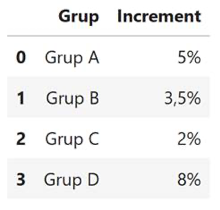

### N2.E01.1 Funciones auxiliares

In [71]:
def adaptar_valores_columna(df_cambio:pd.DataFrame,colum:str, valor_inicial:str, valor_final:str)->pd.DataFrame:
    """Adapto el df de incrementos para que los valores de la columna "Grupo" tengan el mismo nombre que los valores 
    de la columna "Grup Professional" del DF inicial y lo pongo como indice del DF de incrementos

    Args:
        df_cambio (pd.DataFrame): Df con los porcentages de incremento para cada grupo profesional
        colum (str): Nombre columna en para grupo en el DF de incrementos
        valor_inicial (str): Valor que tiene
        valor_final (str): Valor a cambiar

    Returns:
        pd.DataFrame: Devuelve el DF de incremento con el nombre de columna cambiado y como indice del DF
    """
    # Como en el DF la columna "Grup Professional" esta puesto como Grup y en df de incremento esta como Grupo, cambio a Grup en el de incremento
    df_cambio[colum] = df_cambio[colum].str.replace(valor_inicial,valor_final, regex=False)

    # Pongo la columna "Grupo" como indice para pasarlo a un diccionario con clave=Grupo y valor=incremento
    df_cambio = df_cambio.set_index(colum)
    
    return df_cambio
    

In [72]:
def convertir_df_a_diccionario(df_a_convertir:pd.DataFrame)->dict:
    """Combierte un df a un diccionario

    Args:
        df_a_convertir (pd.DataFrame): DF a convertir en lista

    Returns:
        dict: Diccionario resultado de la conversion del DF que le he pasado
    """
    # Combierto el df_increment a un diccionario dic_increment para poder usarlo con map
    lista = df_a_convertir[df_a_convertir.columns[0]].to_dict()
    
    return lista

In [73]:
def crea_columna_incremento(df_cop:pd.DataFrame, dic_incremento:dict)->pd.DataFrame:
    """Crea una columna nueva en el DF que recibe con los valores resultantes del mapeo entre los valosres de la columna "Grup Professional" 
    y el indice del diccionario que recibe. En caso de no coincidencia, pone el valor "0%"

    Args:
        df_cop (pd.DataFrame): Df a añadir la columna
        dic_incremento (dict): Diccionario con los valores a añadir dependiendo de que su indice coincida con los valores de la columna"Grup Professional"

    Returns:
        pd.DataFrame: Devuelve el DF con la columna añadida
    """
    # Combierto el df_increment a un diccionario dic_increment para poder usarlo con map
    df_cop["Incremento"] = df_cop["Grup Professional"].map(dic_incremento).fillna("0%")
    
    return df_cop

In [74]:
def aplicar_incremento(df_aplica:pd.DataFrame)->pd.DataFrame:
    """Actualiza el salario con respecto a el porcentaje de la columna "Incremento" que viene es formato str

    Args:
        df_aplica (pd.DataFrame): Df a actualizar la columna "Salari mensual"

    Returns:
        pd.DataFrame: Devuelve actualizado el DF recibido
    """
    df_aplica["Salari mensual"] = ((((df_aplica["Incremento"].str.replace(",", ".", regex=False).str.replace("%", "", regex=False).str.strip().astype(float))
                                    / 100) + 1)
                                * (df_aplica["Salari mensual"])
                                ).round(2)
    
    return df_aplica

In [75]:
def ejecutar_nivel2_ejercicio_1(df_actualizar:pd.DataFrame, df_incre:pd.DataFrame)-> pd.DataFrame:
    """Orquestador para le ejecucion del ejercicio 1 del nivel 2

    Args:
        df_actualizar (pd.DataFrame): DF con todos los valores a añadir la columna "Incremento" y actualizar el salario
        df_incre (pd.DataFrame): DF con el porcentahe de subidas para cada grupo profesional

    Returns:
        pd.DataFrame: Devuelve el DF resultado despues de realizar el ejercivio 1
    """

    # Ajustar para que los nombres de los grupos sean iguales en el df total y en el df de incremento
    df_incre = adaptar_valores_columna(df_incre,"Grupo", "Grupo", "Grup")


    # Combierto el df_incre a un diccionario dic_increment para poder usarlo con map
    dic_increment = convertir_df_a_diccionario(df_incre)


    # Uso map con diccionario y relleno con "0%" de incremento en los valores que no encuentre 
    df_actualizar = crea_columna_incremento(df_actualizar, dic_increment)

    # Actualizo la columna "Salari mensual" aplicando el porcentaje de subida de la columna "Incremento"
    df_actualizar = aplicar_incremento(df_actualizar)

    display(df_actualizar)
    
    return df_actualizar

### N2.E01.2 Programa principal

In [76]:
# Creo el Df con el incremento por grupo
df_incremento = pd.DataFrame({"Grupo":["Grupo A","Grupo B","Grupo C", "Grupo D" ] , "Incremento":["5%","3,5%","2%","8%"]})

df_copia = ejecutar_nivel2_ejercicio_1(df_copia, df_incremento)

,Nom,Cognoms,País d'origen,Ciutat,Dia,Mes,Año,Gènere,Salari mensual,Grup Professional,Nombre_completo,Nacido_España,Hijos,Fecha_nacimiento,Edad,Incremento
DNI,,,,,,,,,,,,,,,,
28973553Z,Mia,Schneider Fischer,Alemanya,Berlín,22,10,1976,Otros,998.55,Grup A,Mia Schneider Fischer,no,No,1976-10-22,49,5%
37399141L,Laura,Schneider Fischer,Alemanya,Berlín,2,2,1958,Mujer,1830.92,Grup B,Laura Schneider Fischer,no,Si,1958-02-02,68,"3,5%"
37368317L,Lea,Schneider Schneider,Alemanya,Berlín,23,10,2005,Mujer,2083.46,Grup B,Lea Schneider Schneider,no,No,2005-10-23,20,"3,5%"
21390098Z,Mia,Fischer,Alemanya,Berlín,11,8,1950,Mujer,1611.50,Grup B,Mia Fischer,no,Si,1950-08-11,75,"3,5%"
44060014R,Jonas,Schneider,Alemanya,Berlín,22,11,1985,Hombre,2974.32,Grup D,Jonas Schneider,no,Si,1985-11-22,40,8%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89577876S,Emily,Taylor Jones,Regne Unit,Manchester,28,3,1958,Mujer,2104.15,Grup B,Emily Taylor Jones,no,No,1958-03-28,67,"3,5%"
57441590Y,George,Brown Jones,Regne Unit,Manchester,27,12,1979,Hombre,1186.50,Grup A,George Brown Jones,no,Si,1979-12-27,46,5%
58204038A,Olivia,Brown Brown,Regne Unit,Manchester,28,8,1952,Otros,1074.15,Grup A,Olivia Brown Brown,no,No,1952-08-28,73,5%


***################################################################################################################################***

## N2.E02.

Utilizando un bucle, exporta en 4 archivos (formato .xlsx o .csv) los datos de cada Grupo Profesional.

Por ejemplo: "datos_GrupA.xlsx" , "datos_GrupB.xlsx" ...

Exporta un 5º DataFrame en formato .xlsx o .csv que contenga cuántos trabajadores hay por cada Grupo Profesional, cuál es su sueldo medio y cuál es su edad media.

### N2.E02.1 Funciones auxiliares

In [77]:
import pandas as pd
import os

In [78]:
df_copia2 = df_copia.copy()
df_copia2

,Nom,Cognoms,País d'origen,Ciutat,Dia,Mes,Año,Gènere,Salari mensual,Grup Professional,Nombre_completo,Nacido_España,Hijos,Fecha_nacimiento,Edad,Incremento
DNI,,,,,,,,,,,,,,,,
28973553Z,Mia,Schneider Fischer,Alemanya,Berlín,22,10,1976,Otros,998.55,Grup A,Mia Schneider Fischer,no,No,1976-10-22,49,5%
37399141L,Laura,Schneider Fischer,Alemanya,Berlín,2,2,1958,Mujer,1830.92,Grup B,Laura Schneider Fischer,no,Si,1958-02-02,68,"3,5%"
37368317L,Lea,Schneider Schneider,Alemanya,Berlín,23,10,2005,Mujer,2083.46,Grup B,Lea Schneider Schneider,no,No,2005-10-23,20,"3,5%"
21390098Z,Mia,Fischer,Alemanya,Berlín,11,8,1950,Mujer,1611.50,Grup B,Mia Fischer,no,Si,1950-08-11,75,"3,5%"
44060014R,Jonas,Schneider,Alemanya,Berlín,22,11,1985,Hombre,2974.32,Grup D,Jonas Schneider,no,Si,1985-11-22,40,8%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89577876S,Emily,Taylor Jones,Regne Unit,Manchester,28,3,1958,Mujer,2104.15,Grup B,Emily Taylor Jones,no,No,1958-03-28,67,"3,5%"
57441590Y,George,Brown Jones,Regne Unit,Manchester,27,12,1979,Hombre,1186.50,Grup A,George Brown Jones,no,Si,1979-12-27,46,5%
58204038A,Olivia,Brown Brown,Regne Unit,Manchester,28,8,1952,Otros,1074.15,Grup A,Olivia Brown Brown,no,No,1952-08-28,73,5%


In [79]:
def valores_unicos_columna(df_inicial:pd.DataFrame,columna:str)->list:
    """Recive un DF y el nombre de una de sus columnas y devuelve una lista consus valores unicos.
    Si la columna que recibe no esta en las columnas de DF, imprime una Advertencia y devuelve una lista vacia

    Args:
        df_inicial (pd.DataFrame): DF con todos los valores
        columna (str): Nombre de la columna que quiero los valores unicos

    Returns:
        list: Lista ordenada ascendente con los valores unicos de la columna pasada
    """
    if columna in df_inicial.columns:
        lista = sorted(df_inicial[columna].unique())
    else:
        print(f"ADVERTENCIA: Lista vacia porque el nombre de la columna ('{columna}') no existe en el DF que se ha pasado")
        lista = []
    return lista

In [80]:
def filtrar_por_grupo (df_init:pd.DataFrame, grupo:str)->pd.DataFrame:
    """Recibe un DF y un grupo profesional, por el que filtrará el DF segun la columna "Grup Professional".
    El resultado lo devuelve en un DF

    Args:
        df_init (pd.DataFrame): DF con todos los datos
        grupo (str): Grupo de la columna "Grup Professional" por el que quiero filtrar

    Returns:
        pd.DataFrame: DF con el resultado del filtro
    """
    return df_init[df_init["Grup Professional"] == grupo]

In [81]:
def exportar_a_excel(df_exportar:pd.DataFrame, nombre:str):
    """Recibe un DF y lo exportara a un fichero excel con el nombre que tambien recibe.
    Si el fichero ya existe, NO lo exporta, printa una advertencia comunicandolo y pide que lo borres antes del directorio si lo quieres guardar

    Args:
        df_exportar (pd.DataFrame): DF con los datos que quiero exportar a un fichero excel
        nombre (str): Nombre que quiero darle el fichero excel
    """
    # Lo va a exportar en formato excel, es decir con como (,) para separador decimal
    if os.path.exists(nombre):
        print(f"El nombre de archivo '{nombre}' ya existe. Borralo del directorio antes de guardarlo")
    else:
        df_exportar.to_excel(nombre)
        print(f"Fichero '{nombre}' exportado correctamente")

In [82]:
def resumen_trabajadores(df_entero:pd.DataFrame)->pd.DataFrame:
    """Recibe el Df con los datos y devolvera otro DF con los datos filtrados por grupo de cantidad, media de salario y media de edad

    Args:
        df_entero (pd.DataFrame): DF con todos los datos en bruto

    Returns:
        pd.DataFrame: DF con el resultado del filtro por grupo
    """

    df_filtrado = df_entero.groupby("Grup Professional").aggregate({
        "Grup Professional":"count",
        "Salari mensual":"mean", 
        "Edad": "mean"}).rename(columns={
            "Grup Professional" : "Cantidad trabajadores",
            "Salari mensual" : "Salario medio (€)",
            "Edad" : "Edad media (años)"
        })
        
    df_filtrado[["Salario medio (€)", "Edad media (años)"]] = df_filtrado[["Salario medio (€)", "Edad media (años)"]].round(2)
    
    return df_filtrado

In [83]:
def ejecutar_nivel2_ejercicio_2(df_exporta:pd.DataFrame):
    """Orquestador para le ejecucion del ejercicio 2 del nivel 2

    Args:
        df_exporta (pd.DataFrame): Recibe el DF con todos los datos para calcular lo que se nos pide
    """
    # Creo una lista con los valores unicos de la columna "Grup Professional"
    lista_grupos = valores_unicos_columna(df_copia2,"Grup Professional")

    # Bucle para exportar los archivos, uno por cada valor unico de grupo
    for grupo in lista_grupos:
        nombre_fichero = "datos_" + grupo.replace(" ","") +".xlsx"    
        exportar_a_excel((filtrar_por_grupo(df_copia2, grupo)),nombre_fichero)
        
    # Calcular el resumen de los trabajadores por grupo
    df_resumen = resumen_trabajadores(df_exporta)
    
    # Exportar el fichero resumen a excel
    nombre_resumen = "resumen_trabajadores.xlsx"
    print("\n")    # para separar el prontado resultado de los anteriores
    exportar_a_excel(df_resumen, nombre_resumen)


### N2.E02.2 Programa principal

In [106]:
ejecutar_nivel2_ejercicio_2(df_copia)

Fichero 'datos_GrupA.xlsx' exportado correctamente
Fichero 'datos_GrupB.xlsx' exportado correctamente
Fichero 'datos_GrupC.xlsx' exportado correctamente
Fichero 'datos_GrupD.xlsx' exportado correctamente


Fichero 'resumen_trabajadores.xlsx' exportado correctamente


***################################################################################################################################***

# **Nivel 3**

El nivel 3 de este sprint es totalmente diferente a otros sprints que has hecho hasta ahora, ya que son ejercicios más abstractos que requieren pelearse bastante. No siguen con el mismo dataset de los niveles anteriores, sino que te plantean dos situaciones nuevas totalmente distintas entre sí.

## N3.E01.

Crea una función que tome un dataframe como parámetro de entrada.

La función debe crear (y exportar) un gráfico automáticamente para cada columna del dataframe. Por ejemplo:

 - un histograma/boxplot si la variable es numérica
 - unas barras de los valores más frecuentes si es categórica
 - unas barras de los años más frecuentes si el dato está en formato fecha.

La idea es crear una función que funcione por cualquier dataframe, no sólo con lo que hemos trabajado hasta ahora.

Muestra el resultado de la función en alguno de los datasets de ejemplo que contiene el paquete seaborn. Por ejemplo, iris , penguins o titanic .

Ten en consideración que en el siguiente sprint trabajarás exclusivamente con gráficos. El objetivo de este ejercicio no es crear gráficos muy elaborados, sino resolver una necesidad de forma rápida y automática.

### N3.E01.1 Funciones auxiliares

In [85]:
import pandas as pd
import seaborn as sns
from datetime import datetime as dt
import os
import matplotlib.pyplot as plt

In [86]:
def dibuja_histograma(df_hist:pd.DataFrame, ruta:str):
        """Dibuja un grafico del tipo Histograma con los datos que recibe en el DF y lo exporta la ruta completa que tambien recibe

        Args:
            df_hist (pd.DataFrame): DF con los datos para graficar
            ruta (str): Ruta completa donde exportar el gráfico
        """
        df_hist.plot(kind = 'hist', 
                grid = True,
                bins = 20, 
                column = df_hist.columns[0],
                ylabel = 'Frecuencia',
                # xlabel = '',
                title = f'Histograma de {df_hist.columns[0]}'
                )
        plt.tight_layout()   #Ajusta automaticamente el diseño del grafico para que no quede cortado
        plt.savefig(ruta)
        plt.show()
        plt.close()   #Libera la memoria del grafico

In [87]:
def dibuja_boxplot(df_box:pd.DataFrame, ruta:str):
        """Dibuja un grafico del tipo Boxplot con los datos que recibe en el DF y lo exporta la ruta completa que tambien recibe

        Args:
            df_box (pd.DataFrame): DF con los datos para graficar
            ruta (str): Ruta completa donde exportar el gráfico
        """
        df_box.plot(kind = 'box', 
                grid = True,             
                column = df_box.columns[0],
                ylabel = 'Frecuencia',
                # xlabel = '',
                title = f'Boxplot de {df_box.columns[0]}')
        plt.tight_layout()   #Ajusta automaticamente el diseño del grafico para que no quede cortado
        plt.savefig(ruta)
        plt.show()
        plt.close()   #Libera la memoria del grafico

In [88]:
def dibuja_barras(df_bar:pd.DataFrame, x_label:str, titulo_label:str, ruta:str):
    """Dibuja un grafico del tipo Barras con los datos que recibe en el DF y lo exporta la ruta completa que tambien recibe
    Como este gráfico lo vamos a utilizar tanto para columnas de tipo fechas como categóricas, para ajustar mejor el titulo y 
    la etiqueta del eje x, tambien los recibe

    Args:
        df_bar (pd.DataFrame): DF con los datos para graficar
        x_label (str): Etiqueta eje x diferente para cada tipo de datos a graficar
        titulo_label (str): Titulo diferente para cada tipo de datos a graficar
        ruta (str): Ruta completa donde exportar el gráfico
    """
    df_bar.plot(kind = 'bar', 
                grid = False,
                title = titulo_label, 
                ylabel = 'Cantidad',
                xlabel = x_label
                )
    plt.tight_layout()   #Ajusta automaticamente el diseño del grafico para que no quede cortado
    plt.savefig(ruta)
    plt.show()
    plt.close()   #Libera la memoria del grafico

In [89]:
def clasificar_columna_por_tipo(df_clasif:pd.DataFrame)->tuple[list, list, list]:
    """Recibe un DF y clasifica todas sus columnas en numericas, categoricas o fechas según su tipo de datos
    Devuelve una tupla con las 3 listas segun su clasificación
    No tiene en cuanta que podria haber columnas que podrian tener datos numéricos guardados como string o fechas guardados como numéricos o string

    Args:
        df_clasif (pd.DataFrame): DF a clasificar sus columnas

    Returns:
        tuple[list, list, list]: Tupla con las 3 listas de clasificacion (numericas, categoricas y fechas)
    """
    numericas = df_clasif.select_dtypes(include=["number"]).columns.tolist()
    categoricas = df_clasif.select_dtypes(include=["object", "category", "bool"]).columns.tolist()
    fechas = df_clasif.select_dtypes(include=["datetime", "datetime64[ns]"]).columns.tolist()
    
    return numericas, categoricas, fechas

In [90]:
def dibuja_numerica(df_num:pd.DataFrame, colum:str, dir:str):
    """Estrctura los datos de la columna tipo numerica para poder dibujar los graficos: Histograma y Boxplot
    Tambien crea la ruta con el nombre de columna y tipo de grafico para exportarla al directorio en formato png
    Llamara a la función correspondiente que dibuja cada tipo de gráfico

    Args:
        df_num (pd.DataFrame): DF completo que contine la columna a graficar y exportar
        colum (str): Nombre de la columna a graficar y exportar
        dir (str): Directorio o carpeta en la que exportaremos el gráfico
    """
    df_num = df_num[[colum]]
    ruta = os.path.join(dir, f"{colum}.png")
    print(f"=== Gráfico para columna: '{colum}' ===")
    print("Variable numérica → histograma y boxplot")
    ruta = os.path.join(dir, f"{colum}_hist.png")
    dibuja_histograma(df_num, ruta)
    ruta = os.path.join(dir, f"{colum}_box.png")
    dibuja_boxplot(df_num, ruta)

In [91]:
def dibuja_categorica(df_cat:pd.DataFrame, colum:str, dir:str):
    """Estrctura los datos de la columna tipo categórica para poder dibujar los graficos: Barras
    Tambien crea la ruta con el nombre de columna y tipo de grafico para exportarla al directorio en formato png
    Llamara a la función correspondiente que dibuja cada tipo de gráfico

    Args:
        df_cat (pd.DataFrame): DF completo que contine la columna a graficar y exportar
        colum (str): Nombre de la columna a graficar y exportar
        dir (str): Directorio o carpeta en la que exportaremos el gráfico
    """
    df_cat = df_cat[[colum]]
    ruta = os.path.join(dir, f"{colum}_barras.png")
    df_categorica = df_cat.groupby(colum)[colum].count()
    x = df_categorica.index.name
    titulo = f'Categorías más frecuentes de {df_categorica.index.name}'
    print(f"=== Gráfico para columna: '{df_categorica.index.name}' ===")
    print("Variable categórica → barras de frecuencias")
    dibuja_barras(df_categorica, x, titulo, ruta)

In [92]:
def dibuja_fecha(df_fech:pd.DataFrame, colum:str, dir:str):
    """Estrctura los datos de la columna tipo fecha para poder dibujar los graficos: Barras
    Tambien crea la ruta con el nombre de columna y tipo de grafico para exportarla al directorio en formato png
    Llamara a la función correspondiente que dibuja cada tipo de gráfico

    Args:
        df_fech (pd.DataFrame): DF completo que contine la columna a graficar y exportar
        colum (str): Nombre de la columna a graficar y exportar
        dir (str): Directorio o carpeta en la que exportaremos el gráfico
    """
    df_fech = df_fech[[colum]]
    ruta = os.path.join(dir, f"{colum}_barras.png")
    df_años = df_fech.groupby(df_fech[colum].dt.year).count()
    x = "Años"
    titulo = f'{x} más frecuentes en {df_años.index.name}'
    print(f"=== Gráfico para columna: '{df_años.index.name}' ===")
    print("Variable fecha → barras por año")
    dibuja_barras(df_años, x, titulo, ruta)


In [93]:
def ejecutar_nivel3_ejercicio_1(df_graf:pd.DataFrame, directorio:str):
    """Orquestador para le ejecucion del ejercicio 1 del nivel 3
    Crea una carpeta en el directorio de trabajo, si no existe, para guardar los gráficos

    Args:
        df_graf (pd.DataFrame): Recibe el DF que queremos, de cada columna, graficar y exportar segun su tipo de datos
        directorio (str): Recibe el directorio en el que se guardara un fichero para cada gráfico
    """

    cols_numericas, cols_categoricas, cols_fechas = clasificar_columna_por_tipo(df_graf)
    
    print(f"Columnas numéricas: {cols_numericas}")
    print(f"Columnas categóricas: {cols_categoricas}")
    print(f"Columnas fechas: {cols_fechas}\n")
    
    os.makedirs(directorio, exist_ok=True) #si no existe lo crea y si ya existe no hace nada


    for columna in df_graf.columns:
        if columna in cols_numericas:        
            dibuja_numerica(df_graf, columna, directorio)
        elif columna in cols_categoricas:        
            dibuja_categorica(df_graf, columna, directorio)
        elif columna in cols_fechas:
            dibuja_fecha(df_graf, columna, directorio)
        else:
            print(f"No se puede graficar la columna {columna}")

### N3.E01.2 Programa principal

Columnas numéricas: ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
Columnas categóricas: ['species', 'island', 'sex']
Columnas fechas: []

=== Gráfico para columna: 'species' ===
Variable categórica → barras de frecuencias


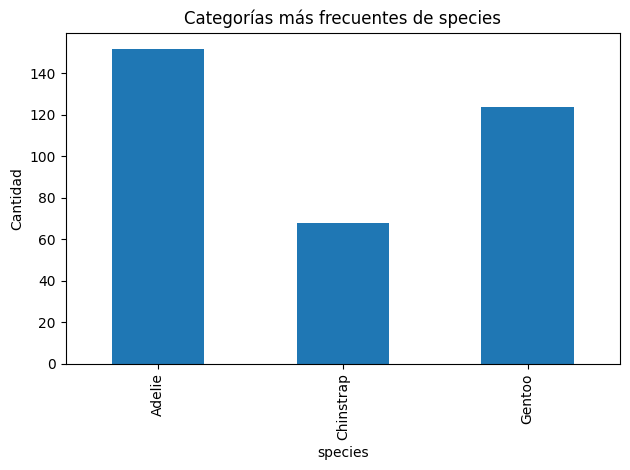

=== Gráfico para columna: 'island' ===
Variable categórica → barras de frecuencias


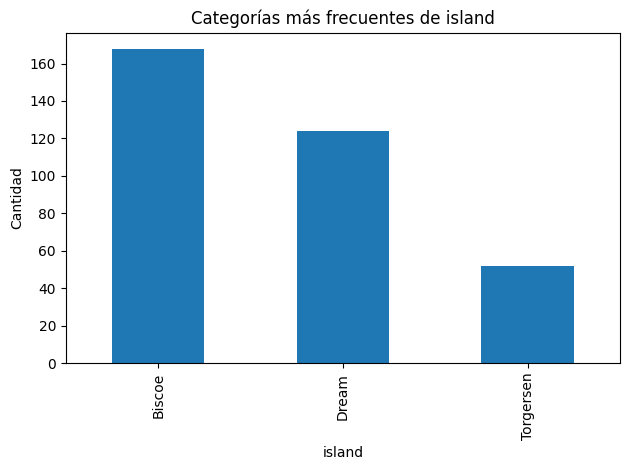

=== Gráfico para columna: 'bill_length_mm' ===
Variable numérica → histograma y boxplot


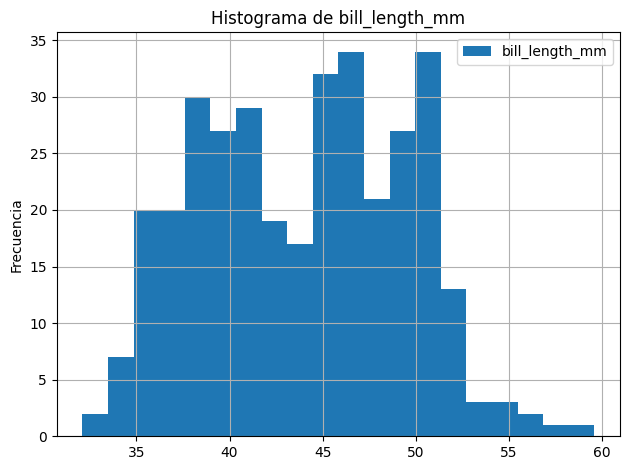

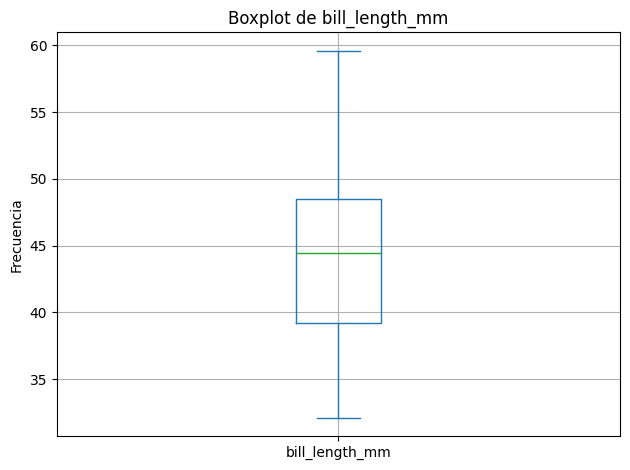

=== Gráfico para columna: 'bill_depth_mm' ===
Variable numérica → histograma y boxplot


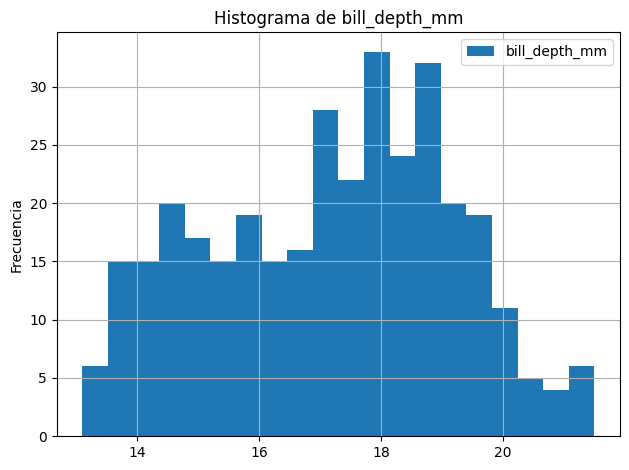

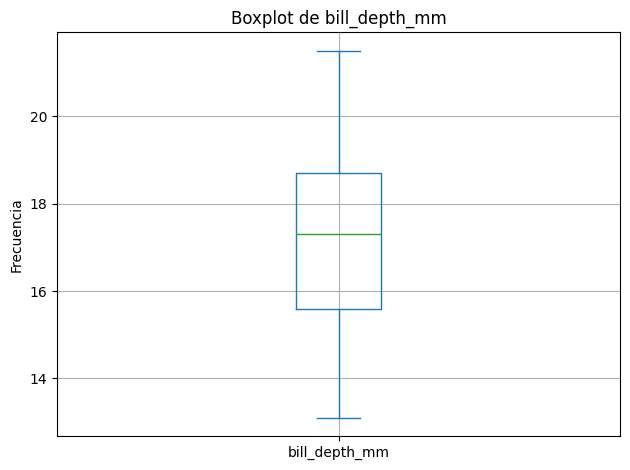

=== Gráfico para columna: 'flipper_length_mm' ===
Variable numérica → histograma y boxplot


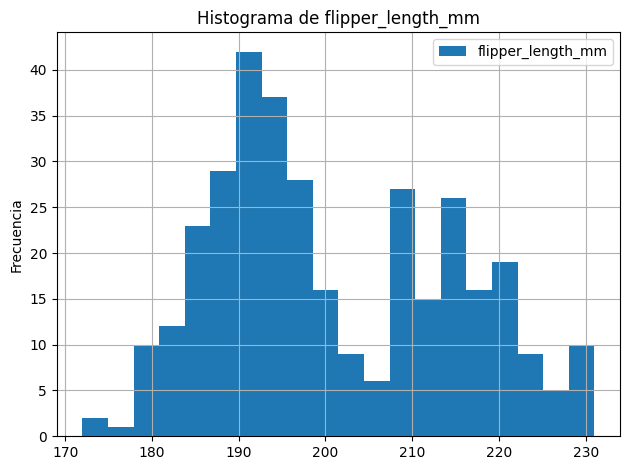

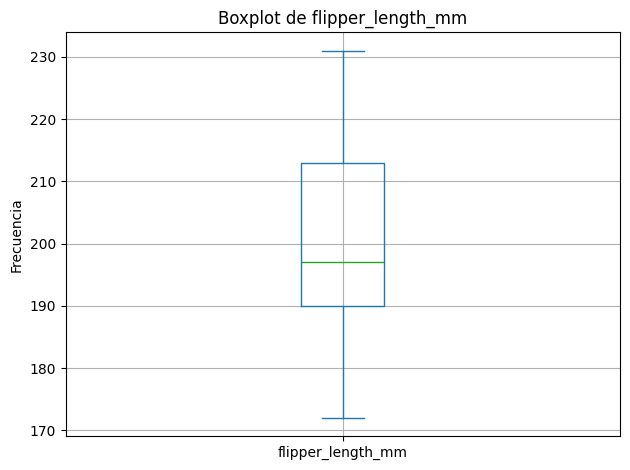

=== Gráfico para columna: 'body_mass_g' ===
Variable numérica → histograma y boxplot


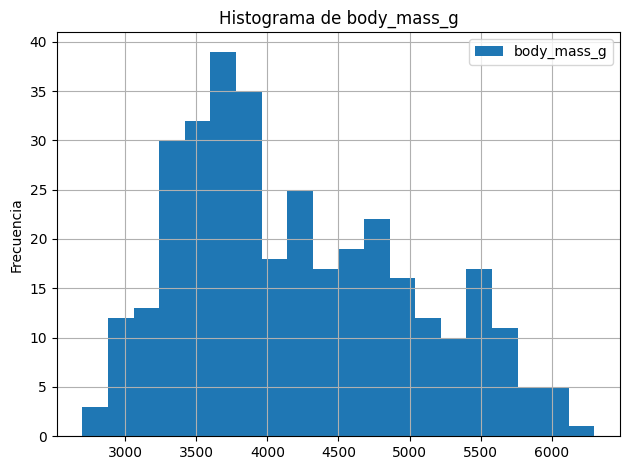

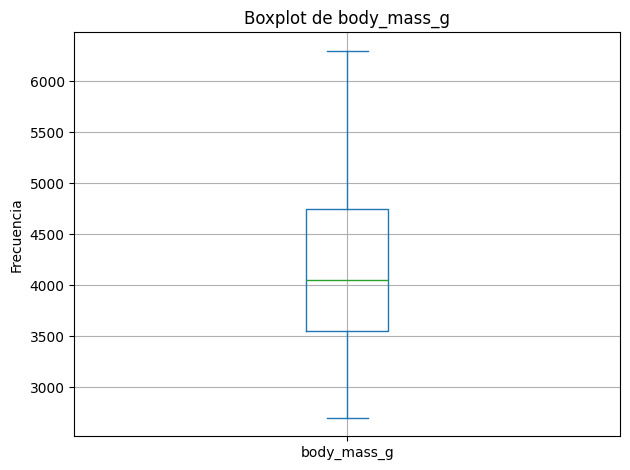

=== Gráfico para columna: 'sex' ===
Variable categórica → barras de frecuencias


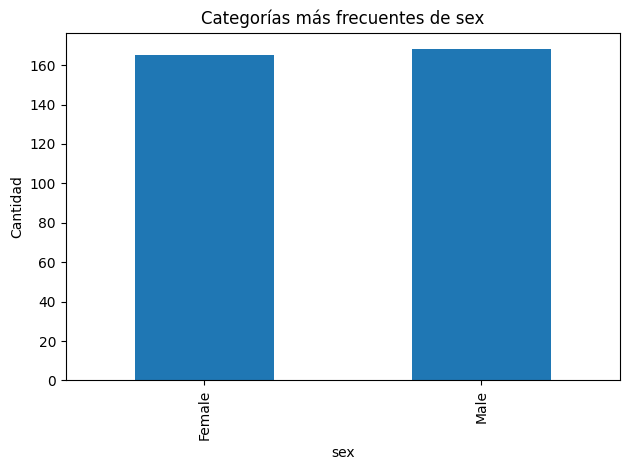

In [94]:
# ##########  Dejo algunos DF comentados para probar su funcionamiento dejando descomentado solo uno  ################3

# DF del sprint 10
# df_graficar_columnas = df_copia

# Dataset de seaborn: "penguins"
df_graficar_columnas = sns.load_dataset("penguins")

# Dataset de seaborn: "iris"
# df_graficar_columnas = sns.load_dataset("iris")

# Dataset de seaborn: "titanic"
# df_graficar_columnas = sns.load_dataset("titanic")

# Nombre de carpeta a exportar los graficos
carpeta = "graficos"

ejecutar_nivel3_ejercicio_1(df_graficar_columnas, carpeta)

***################################################################################################################################***

## N3.E02.

Carga el archivo matriz_distancies.xlsx en pandas, de modo que los nombres de filas y los nombres de columnas sean los de las ciudades. Borra "Las Palmas de Gran Canaria" y "Palma" para que podamos realizar el trayecto en coche.

Fuente: Mejoras Rutas

Nos interesa visitar todas las principales ciudades de España recorriendo la mínima distancia posible.

No hace falta que lo hagas de forma óptima, nos interesa que desarrolles una solución razonable utilizando las herramientas que tienes actualmente.

Por ejemplo, una aproximación sencilla (que no óptima) sería yendo siempre a la ciudad más cercana que no hayamos visitado todavía

Haz una función que dada la matriz de distancias y la ciudad de origen, haga una propuesta de ruta que sea lo más corta posible que puedas, devolviendo una lista con el orden de visita. Da también la distancia total recorrida.

(EXTRA) Desde qué ciudad la ruta sería más corta con el algoritmo planteado

### N3.E02.1 Funciones auxiliares

In [25]:
import pandas as pd

In [95]:
def carga_limpia_excel(nombre_excel:str)->pd.DataFrame:
    """Carga el fichero excel cuyo nombre recibe en un DF y lo limpia:
    - Elimina las columnas "Palma" y "Las Palmas de Gran Canaria"
    - Elimina las filas "Palma" y "Las Palmas de Gran Canaria"
    - Las celdas diagonal que estan a NaN las rellena a cero (0)

    Args:
        nombre_excel (str): Nombre del fichero excel a cargar

    Returns:
        pd.DataFrame: Data Frame donde carga el fichero excel
    """
    # Uso la funcion de importad a df un fichero excel realizada en el Nivel 1, Ejercicio 1
    df_dist = importar_excel_df("matriu_distancies.xlsx",0)


    # Borrar columna "Palma" y "Las Palmas de Gran Canaria"
    df_dist.drop(["Palma","Las Palmas de Gran Canaria"], axis=1, inplace=True)


    # Borrar fila "Palma" y "Las Palmas de Gran Canaria"
    df_dist.drop(["Palma","Las Palmas de Gran Canaria"], inplace=True)


    # Reemplazo el NaN por 0
    df_dist=df_dist.fillna(0)
    df_dist
    
    return df_dist


In [97]:
def elimina_fila_ciudad_actual(df_ciudades:pd.DataFrame, borra_ciudad)->pd.DataFrame:
    """Recibe una fila a eliminar en el DF que tambien recibe. 
    Es la fila de la ciudad que estoy para que no aprezca como destino mas cercano (seria valor 0) en su columna

    Args:
        df_ciudades (pd.DataFrame): DF con todas las columnas originales y las filas de la ciudad donde estoy y las que quedan por visitar
        borra_ciudad (_type_): Ciudad en la que estoy y quiero borrar su fila

    Returns:
        pd.DataFrame: DF recibido con la fila de la ciudad en que estoy eliminada
    """
    return df_ciudades.drop([borra_ciudad])

In [98]:
def ciudad_mas_cercana(df_ciudad:pd.DataFrame, ciudad_estoy:str)->tuple[str, float]:
    """Recibe un DF con la ciudad en que estoy, y busca en su columna el valor minimo de todos y si hay repetidos, coge el primero que apatrece.
    Me devolvera ese valor minimo y su indice que corresponde al nombre de la ciudad m´ñas cercana

    Args:
        df_ciudad (pd.DataFrame): DF con todas las columnas y solo las filas de las ciudades que me quedan por visitar
        ciudad_estoy (str): Ciudad actual en la que estoy

    Returns:
        tuple[str, float]: Tupla que en la posicion 0 esta el nombre de la proxima ciudad a visitar y en la posicion 1 la distancia hasta ella
    """
    ciudad_cercana = df_ciudad[ciudad_estoy].idxmin()
    distancia_cercana = df_ciudad[ciudad_estoy].min()
    
    return ciudad_cercana, distancia_cercana

In [99]:
def guardar_resultado_trayecto(df_resul:pd.DataFrame, next_ciudad:str, next_distancia:float)->pd.DataFrame:
    """Añade en la ultima posicion del DF con el trayecto hasta ahora, la siguiente ciudad, los Kms hasta ella y 
    actualiza el acumulado sumando los Kms hasta ella

    Args:
        df_resul (pd.DataFrame): DF con los datos del trayecto hasta ahora
        next_ciudad (str): Nombre de la siguiente ciudad a visitar
        next_distancia (float): Distancia hasta la siguiente ciudad a visitar

    Returns:
        pd.DataFrame: DF actualizado con los datos de la siguiente ciudad a visitar
    """
    df_resul.loc[len(df_resul)] = [next_ciudad, next_distancia, (df_resul.loc[len(df_resul)-1,"km_acumulados"] + next_distancia)]
    return df_resul

In [100]:
def guardar_segun_ciudad_inicio(dic_total:dict, df_trayecto_completo:pd.DataFrame)->dict:
    """Añado a un diccionario cuya clave sera la ciudad de salida y su valor sera un DF con todo el itinerario y Kms

    Args:
        dic_total (dict): Diccionario donde voy guardando todos los trayectos o itinerarios
        df_trayecto_completo (pd.DataFrame): Trayecto a añadir al diccionario

    Returns:
        dict: Diccionario actualizado con el trayecto añadido
    """
    
    dic_total[df_trayecto_completo.loc[0,df_trayecto_completo.columns[0]]] = df_trayecto_completo
    return dic_total
    
    

In [101]:
def calcular_itinerario(df_distancias:pd.DataFrame, ciudad_ini:str, df_resul:pd.DataFrame)->pd.DataFrame:
    """Recibo la ciudad en la que inicio y voy confeccionando el trayecto ciudad a ciudad hasta visitar todas

    Args:
        df_distancias (pd.DataFrame): DF con todas las distancias entre las ciudades
        ciudad_ini (str): Ciudad en la que empiezo el trayecto
        df_resul (pd.DataFrame): DF donde se van almacenado los datos que van confeccionando el trayecto

    Returns:
        pd.DataFrame: DF con el trayecto completo visitando todas las ciudades
    """
    for columna in range(len(df_distancias) - 1):
    
        # Elimino la fila de la ciudad que estoy para eliminar el valo 0 en el cruce con su columna
        df_distancias = elimina_fila_ciudad_actual(df_distancias, ciudad_ini)

        # Calculo cual es la ciudad y la distancia. OJO en caso de empate coge la que esta en la fila menor de ambas
        ciudad_cerca, distancia_minima = ciudad_mas_cercana(df_distancias, ciudad_ini)
        # print(ciudad_cerca, distancia_minima)

        # Los almaceno en un DF resultado
        df_resul = guardar_resultado_trayecto(df_resul, ciudad_cerca, distancia_minima)
        # df_resultado
        ciudad_ini = ciudad_cerca
    
    return df_resul

In [102]:
def entra_ciudad_origen(lis_columnas:list)->str:
    """Pedir que intruduzcas la ciudad desde donde quieres empezar y tiene que estar en la lista que se muestra.
    Si no la escribe excatamente igual o no esta en la lista, te avisa y te calcula por defecto con inicio en "Barcelona"

    Args:
        lis_columnas (list): Lista de todas las ciudades que hay que visitar y que pueden ser origen del trayecto

    Returns:
        str: Nombre de la ciudad que será el origen del trayecto
    """
    ciu_ori = input(f"Introduce la ciudad de Orige según esta lista {lis_columnas}")
    
    if ciu_ori in lis_columnas:
        return ciu_ori
    else:
        print(f"la ciudad introducida {ciu_ori} no esta en la lista inicial\n")
        print(f"Por defecto lo calculo con origen Barcelona")
        
        return "Barcelona"

In [103]:
def calcular_desde_todas(df_dis:pd.DataFrame, lis_colums:list)->dict:
    """Calcula el itinerario resultante para todos los posibles inicios y lso guardara en un diccionario

    Args:
        df_dis (pd.DataFrame): Df con todas las distancias entre ciudades
        lis_colums (list): lista con todas las ciudades que pueden ser origen y que hay que visitarlas todas

    Returns:
        dict: Diccinario con una clave para cada ciudad donde en el valor estará su itinerario
    """
    dic_total = {}
    for ciudad in lis_colums:
        df_re = pd.DataFrame(columns=["Ciudad", "km_con_anterior", "km_acumulados"])
        df_re.loc[len(df_re)] = [ciudad, 0, 0]
        
        # Calcular el itinerario partiendo de la ciudad de inicio
        df_re = calcular_itinerario(df_dis, ciudad, df_re)
        
        #Añadir al dicionario segun ciudad de inicio
        dic_total = guardar_segun_ciudad_inicio(dic_total, df_re)
        
    return dic_total

In [104]:
def orden_rutas_optimas (dic_todos:dict)->pd.DataFrame:
    """Creo un DF con una columna con la ciudad de origen y otra columna con los Kms totales recorridos al visitar todas las ciudades


    Args:
        dic_todos (dict): Diccionario con todas las ciudades con su itinerario total

    Returns:
        pd.DataFrame: DF ordenado ascendentemente por los Kms acumulados al visitar todas las ciudades por ciudad
    """

    lis_filas = []

    for ciudad, df in dic_todos.items():
        total = df.iloc[-1, -1]   # última fila, última columna donde estan los Kms acumulados finales
        lis_filas.append([ciudad, total])

    df_totales = pd.DataFrame(lis_filas, columns=["Ciudad_inicio", "km_totales"])
    df_totales = df_totales.sort_values("km_totales").reset_index(drop=True) # Ordeno para que el de menos Kms acumulado salga el primero
    
    return df_totales


In [ ]:
def ejecutar_nivel3_ejercicio_2():
    """Orquestador para le ejecucion del ejercicio 2 del nivel 3
    El fichero con los datos esta en el directorio de trabajo que esta el fichero .ipynb
    """
    #Cargar y limpiar el excel como nos dice el ejercicio
    df_viaje = carga_limpia_excel("matriu_distancies.xlsx")
    
    # Datos iniciales
    df_resultado = pd.DataFrame(columns=["Ciudad", "km_con_anterior", "km_acumulados"])
    # dic_segun_inicio = {}
    lista_columnas = df_viaje.columns

    # Pide la ciudad de inicio
    ciudad_inicio = entra_ciudad_origen(lista_columnas)

    df_resultado.loc[len(df_resultado)] = [ciudad_inicio, 0, 0]
    ciudad_estoy = ciudad_inicio

    # Calcular el itinerario partiendo de la ciudad de inicio
    df_resultado = calcular_itinerario(df_viaje, ciudad_estoy, df_resultado)

    display(df_resultado)

    #Añadir a un dicionario con todas las ciudades de inicio
    dic_todos_inicios = calcular_desde_todas(df_viaje, lista_columnas)

    # Crear un DF con la ciudad de origen y el acumulado de Km recorridos y ordenarlos ascendente
    print("*******************************************************************************")
    print("Con origen en todas las ciudades ordenadas por menor Kms totales recorridos")
    display(orden_rutas_optimas(dic_todos_inicios))


### N3.E02.2 Programa principal

In [40]:
ejecutar_nivel3_ejercicio_2()

,Ciudad,km_con_anterior,km_acumulados
0,Zaragoza,0.0,0.0
1,Valencia,246.0,246.0
2,Alicante,125.0,371.0
3,Murcia,69.0,440.0
4,Córdoba,320.0,760.0
5,Sevilla,121.0,881.0
6,Málaga,158.0,1039.0
7,Valladolid,549.0,1588.0
8,Gijón,224.0,1812.0
9,Bilbao,223.0,2035.0


*******************************************************************************
Con origen en todas las ciudades ordenadas por menor Kms totales recorridos


,Ciudad_inicio,km_totales
0,Barcelona,2778.0
1,Hospitalet de Llobregat,2784.0
2,Vigo,2873.0
3,Sevilla,2956.0
4,Córdoba,2981.0
5,Málaga,3066.0
6,Murcia,3082.0
7,Alicante,3134.0
8,Valencia,3200.0
9,Valladolid,3357.0
